<a href="https://colab.research.google.com/github/the-cryptozoologist/data-science/blob/main/entropy/entropy-of-written-turkish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entropy of written Turkish

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
from io import IncrementalNewlineDecoder
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline 

import requests
import re

from wordcloud import WordCloud

In [6]:
text1=open("/content/drive/MyDrive/Colab Notebooks/ince-memed/ince-memed-1.txt","r")
text2=open("/content/drive/MyDrive/Colab Notebooks/ince-memed/ince-memed-2.txt","r")
text3=open("/content/drive/MyDrive/Colab Notebooks/ince-memed/ince-memed-3.txt","r")
text4=open("/content/drive/MyDrive/Colab Notebooks/ince-memed/ince-memed-4.txt","r")

In [7]:
# Read texts

txt1 = text1.read()
txt2 = text2.read()
txt3 = text3.read()
txt4 = text4.read()

In [8]:
txt1[:1000]

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nYaşar Kemal \n\n\nİnce Memed \n\n\n\nDuvarın dibinde resmim aldılar \nAk kağıt üstünde tanıyın beni \n\n\n\nGiriş \n\n\n3 \n\n\ni \n\n\nToros dağlarının etekleri ta Akdenizden başlar. Kıyıları döven ak \nköpüklerden sonra doruklara doğru yavaş yavaş yükselir. Akdenizin \nüstünde daima, top top ak bulutlar salınır. Kıyılar dümdüz, cilalanmış gibi \ndüz killi topraklardır. Killi toprak et gibidir. Bu kıyılar saatlerce içe kadar \ndeniz kokar, tuz kokar. Tuz keskindir. Düz, killi, sürülmüş topraklardan \nsonra Çukurovanın bükleri başlar. Örülmüşçesine sık çalılar, kamışlar, \nböğürtlenler, yaban asmaları, sazlarla kaplı, koyu yeşil, ucu bucağı \nbelirsiz alanlardır bunlar. Karanlık bir ormandan daha yabani, daha \nkaranlık! \n\nBiraz daha içeri, bir taraftan Anavarzaya, bir taraftan Osmaniyeyi \ngeçip İslahiyeye gidilecek olursa geniş bataklıklara varılır. Bataklıklar yaz \naylarında fıkır fıkır kaynar. Kir

In [9]:
txt2[:1000]

"Yaşar Kemal \nİNCE MEMED2 \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nİNCE MEMED 2 \n\n\nYaşar Kemal 1923'te Osmaniye'nin Hemite (bugün Gökçedam) köyünde \ndoğdu. Komşu Burhanlı köyünde başladığı ilköğrenimini Kadirli'de \ntamamladı. Adana'da ortaokula devam ederken bir yandan da çırçır \nfabrikalarında çalıştı. Ortaokulu son sınıf öğrencisiyken terk ettikten sonra \nırgat kâtipliği, ırgatbaşılık, öğretmen vekilliği, kütüphane memurluğu, \ntraktör sürücülüğü, çeltik tarlalarında kontrolörlük yaptı. 1940'lı yılların \nbaşlarında Pertev Naili Boratav, Abidin Dino ve Arif Dino gibi sol eğilimli \nsanatçı ve yazarlarla ilişki kurdu, 17 yaşındayken siyasi nedenlerle ilk \ntutukluluk deneyimini yaşadı. 1943'te bir folklor derlemesi olan ilk kitabı \nAğıtlafı yayımladı. Askerliğini yaptıktan sonra 1946'da gittiği İstanbul'da \nFransızlara ait Havagazı Şirketi'nde gaz kontrol memuru olarak çalıştı. \n1948'de Kadirli'ye döndü, bir süre yine çeltik tarlalarında kontr

In [10]:
txt3[:1000]

"\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nYAŞAR KEMAL \n\n\nİNCE MEMED 3 \n\n\nROMAN \n\n\n\nYapı Kredi Yayınları -1954 \nEdebiyat - 553 \nİnce Memed 3 / Yaşar Kemal \nKitap Editörü: Tamer Erdoğan \nDüzelti: Eylül Duru \nKapak Tasarımı: Yeşim Balaban \n\n\n\nİNCE MEMED 3 \n\n\nYaşar Kemal 1923'te Osmaniye'nin Hemite (bugün Gökçedam) köyünde doğdu. \nKomşu Burhanlı köyünde başladığı ilköğrenimini Kadirli'de tamamladı. \nAdana'da ortaokula devam ederken bir yandan da çırçır fabrikalarında çalıştı. \nOrtaokulu son sınıf öğrencisiyken terk ettikten sonra ırgat kâtipliği, ırgatbaşılık, \nöğretmen vekilliği, kütüphane memurluğu, traktör sürücülüğü, çeltik tarlalarında \nkontrolörlük yaptı. 1940'lı yılların başlarında Pertev Naili Boratav, Abidin Dino \nve Arif Dino gibi sol eğilimli sanatçı ve yazarlarla ilişki kurdu, 17 yaşındayken \nsiyasi nedenlerle ilk tutukluluk deneyimini yaşadı. 1943'te bir fo

In [11]:
txt4[:1000]

"\nİNCE MCMED4 \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nİNCE MEMED 4 \n\n\nYaşar Kemal 1923'te Osmaniye'nin Hemite (bugün Gökçedam) köyünde doğdu. \nKomşu Burhanlı köyünde başladığı ilköğrenimini Kadirli'de tamamladı. \nAdana'da ortaokula devam ederken bir yandan da çırçır fabrikalarında çalıştı. \nOrtaokulu son sınıf öğrencisiyken terk ettikten sonra ırgat kâtipliği, ırgatbaşılık, \nöğretmen vekilliği, kütüphane memurluğu, traktör sürücülüğü, çeltik tarlalarında \nkontrolörlük yaptı. 1940'lı yılların başlarında Pertev Naili Boratav, Abidin Dino \nve Arif Dino gibi sol eğilimli sanatçı ve yazarlarla ilişki kurdu, 17 yaşındayken \nsiyasi nedenlerle ilk tutukluluk deneyimini yaşadı. 1943'te bir folklor derlemesi \nolan ilk kitabı Ağıtlafı yayımladı. Askerliğini yaptıktan sonra 1946'da gittiği \nİstanbul'da Fransızlara ait Havagazı Şirketinde gaz kontrol memuru olarak \nçalıştı. 1948'de Kadirli'ye döndü, bir süre yine çeltik tarlalarında kontrolörlük, \ndaha sonra arz

In [12]:
# Replace patterns

regex = re.compile(r"\n")
regex_i = re.compile(r"i̇")

txt1 = regex.sub(" ", txt1)
txt1 = regex_i.sub("i", txt1)

txt1[:1000]

'                                         Yaşar Kemal    İnce Memed     Duvarın dibinde resmim aldılar  Ak kağıt üstünde tanıyın beni     Giriş    3    i    Toros dağlarının etekleri ta Akdenizden başlar. Kıyıları döven ak  köpüklerden sonra doruklara doğru yavaş yavaş yükselir. Akdenizin  üstünde daima, top top ak bulutlar salınır. Kıyılar dümdüz, cilalanmış gibi  düz killi topraklardır. Killi toprak et gibidir. Bu kıyılar saatlerce içe kadar  deniz kokar, tuz kokar. Tuz keskindir. Düz, killi, sürülmüş topraklardan  sonra Çukurovanın bükleri başlar. Örülmüşçesine sık çalılar, kamışlar,  böğürtlenler, yaban asmaları, sazlarla kaplı, koyu yeşil, ucu bucağı  belirsiz alanlardır bunlar. Karanlık bir ormandan daha yabani, daha  karanlık!   Biraz daha içeri, bir taraftan Anavarzaya, bir taraftan Osmaniyeyi  geçip İslahiyeye gidilecek olursa geniş bataklıklara varılır. Bataklıklar yaz  aylarında fıkır fıkır kaynar. Kirli, pistir. Kokudan yanına yaklaşılmaz.  Çürümüş saz, çürümüş ot, ağaç, ka

In [13]:
txt2 = regex.sub(" ", txt2)
txt2 = regex_i.sub("i", txt2)

txt2[:1000]

"Yaşar Kemal  İNCE MEMED2                                     İNCE MEMED 2    Yaşar Kemal 1923'te Osmaniye'nin Hemite (bugün Gökçedam) köyünde  doğdu. Komşu Burhanlı köyünde başladığı ilköğrenimini Kadirli'de  tamamladı. Adana'da ortaokula devam ederken bir yandan da çırçır  fabrikalarında çalıştı. Ortaokulu son sınıf öğrencisiyken terk ettikten sonra  ırgat kâtipliği, ırgatbaşılık, öğretmen vekilliği, kütüphane memurluğu,  traktör sürücülüğü, çeltik tarlalarında kontrolörlük yaptı. 1940'lı yılların  başlarında Pertev Naili Boratav, Abidin Dino ve Arif Dino gibi sol eğilimli  sanatçı ve yazarlarla ilişki kurdu, 17 yaşındayken siyasi nedenlerle ilk  tutukluluk deneyimini yaşadı. 1943'te bir folklor derlemesi olan ilk kitabı  Ağıtlafı yayımladı. Askerliğini yaptıktan sonra 1946'da gittiği İstanbul'da  Fransızlara ait Havagazı Şirketi'nde gaz kontrol memuru olarak çalıştı.  1948'de Kadirli'ye döndü, bir süre yine çeltik tarlalarında kontrolörlük,  daha sonra arzuhalcilik yaptı. 1950'de ko

In [14]:
txt3 = regex.sub(" ", txt3)
txt3 = regex_i.sub("i", txt3)

txt3[:1000]

"                                                                   YAŞAR KEMAL    İNCE MEMED 3    ROMAN     Yapı Kredi Yayınları -1954  Edebiyat - 553  İnce Memed 3 / Yaşar Kemal  Kitap Editörü: Tamer Erdoğan  Düzelti: Eylül Duru  Kapak Tasarımı: Yeşim Balaban     İNCE MEMED 3    Yaşar Kemal 1923'te Osmaniye'nin Hemite (bugün Gökçedam) köyünde doğdu.  Komşu Burhanlı köyünde başladığı ilköğrenimini Kadirli'de tamamladı.  Adana'da ortaokula devam ederken bir yandan da çırçır fabrikalarında çalıştı.  Ortaokulu son sınıf öğrencisiyken terk ettikten sonra ırgat kâtipliği, ırgatbaşılık,  öğretmen vekilliği, kütüphane memurluğu, traktör sürücülüğü, çeltik tarlalarında  kontrolörlük yaptı. 1940'lı yılların başlarında Pertev Naili Boratav, Abidin Dino  ve Arif Dino gibi sol eğilimli sanatçı ve yazarlarla ilişki kurdu, 17 yaşındayken  siyasi nedenlerle ilk tutukluluk deneyimini yaşadı. 1943'te bir folklor derlemesi  olan ilk kitabı Ağıtlafı yayımladı. Askerliğini yaptıktan sonra 1946'da gittiği

In [15]:
regex_mecmed = re.compile(r"MCMED")

txt4 = regex.sub(" ", txt4)
txt4 = regex_i.sub("i", txt4)
txt4 = regex_mecmed.sub("MEMED", txt4)

txt4[:1000]

" İNCE MEMED4                                İNCE MEMED 4    Yaşar Kemal 1923'te Osmaniye'nin Hemite (bugün Gökçedam) köyünde doğdu.  Komşu Burhanlı köyünde başladığı ilköğrenimini Kadirli'de tamamladı.  Adana'da ortaokula devam ederken bir yandan da çırçır fabrikalarında çalıştı.  Ortaokulu son sınıf öğrencisiyken terk ettikten sonra ırgat kâtipliği, ırgatbaşılık,  öğretmen vekilliği, kütüphane memurluğu, traktör sürücülüğü, çeltik tarlalarında  kontrolörlük yaptı. 1940'lı yılların başlarında Pertev Naili Boratav, Abidin Dino  ve Arif Dino gibi sol eğilimli sanatçı ve yazarlarla ilişki kurdu, 17 yaşındayken  siyasi nedenlerle ilk tutukluluk deneyimini yaşadı. 1943'te bir folklor derlemesi  olan ilk kitabı Ağıtlafı yayımladı. Askerliğini yaptıktan sonra 1946'da gittiği  İstanbul'da Fransızlara ait Havagazı Şirketinde gaz kontrol memuru olarak  çalıştı. 1948'de Kadirli'ye döndü, bir süre yine çeltik tarlalarında kontrolörlük,  daha sonra arzuhalcilik yaptı. 1950'de komünizm propagandası

In [16]:
# Change case and split text into words

words1 = txt1.lower().split()
words2 = txt2.lower().split()
words3 = txt3.lower().split()
words4 = txt4.lower().split()

In [17]:
# Punctuation removal function

def remove_punc(string):
  punc = "'!()-[]|{};:.ï»¿“”’<>?@^*$\",0123456789="
  for s in string:
    if s in punc:
      string = string.replace(s, "")
  return string

In [18]:
# Remove punctuation from words

clean1 = [remove_punc(i) for i in words1]
clean2 = [remove_punc(i) for i in words2]
clean3 = [remove_punc(i) for i in words3]
clean4 = [remove_punc(i) for i in words4]

In [19]:
print(len(clean1))
print(len(clean2))
print(len(clean3))
print(len(clean4))

87027
109102
159101
166932


In [35]:
# WordCloud function

def wordcloud_generator(text_list, text_num):
    plt.figure(figsize=[70,50])
    k = np.ceil(text_num/4)
    for t in range(text_num):
        i=t+1
        plt.subplot(k, 4, i).set_title("Text" + str(t+1), size=50)
        plt.plot()
        plt.imshow(WordCloud(max_font_size=50, background_color="white").generate(text_list[t]), interpolation="bilinear")
        plt.axis("off")
    plt.show()

In [36]:
# WordCloud

clean_txt1 = " ".join(clean1)
clean_txt2 = " ".join(clean2)
clean_txt3 = " ".join(clean3)
clean_txt4 = " ".join(clean4)

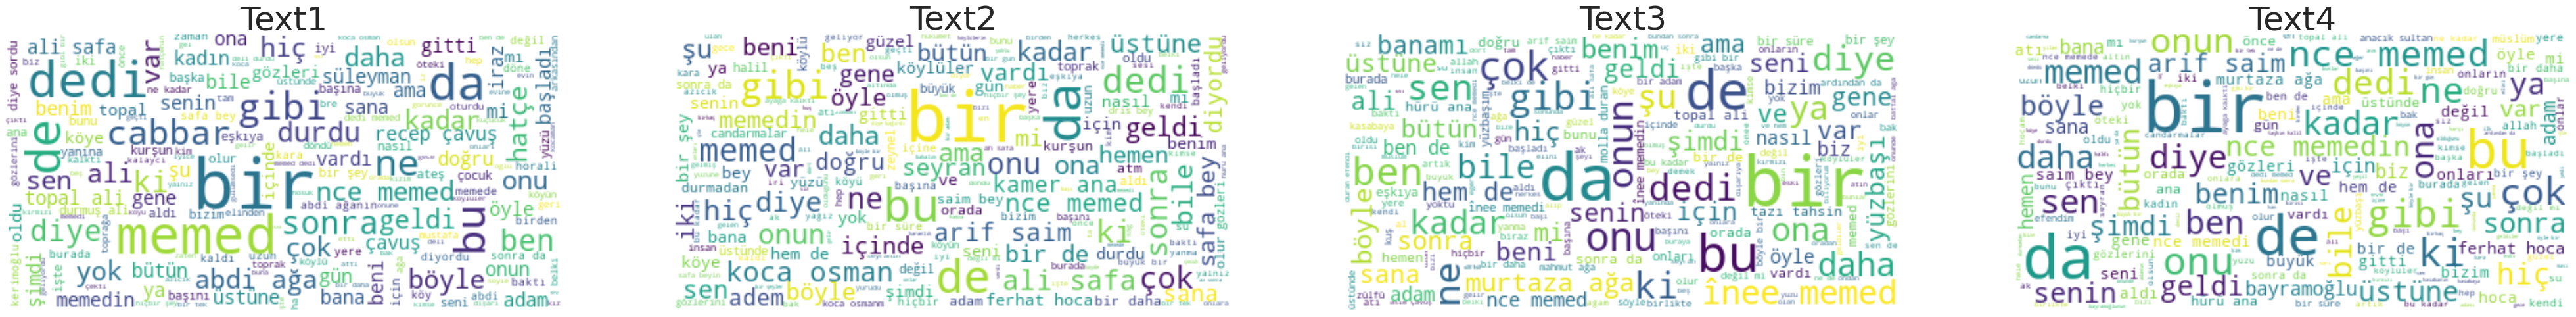

In [37]:
text_list = [clean_txt1, clean_txt2, clean_txt3, clean_txt4]

cloud = wordcloud_generator(text_list, len(text_list))
cloud

In [38]:
# Counter functions

from collections import Counter

def word_counter(c):
  return pd.DataFrame.from_records(list(dict(c).items()), columns = ["Word","Count"])

def word_count(counter):
  return list(counter["Count"])

def letter_count(counter, txt):
  alphabet = ["a","b","c","ç","d","e","f","g","ğ","h","ı","i","j","k","l","m","n","u","ü","v","y","z"]
  for i in range(0,len(alphabet)):
    counter.append(txt.lower().count(alphabet[i]))
  df =pd.DataFrame(alphabet, columns = ["Letter"])
  df["Frequency"] = counter
  return df

def len_counter(clean):
  df = pd.DataFrame(clean, columns = ["Word"])
  df["Length"] = df["Word"].str.len()
  return df["Length"].value_counts().drop(0).sort_index()

In [41]:
# Plotter

def plotter(data, x, y, title):
  plt.figure(figsize=(20,10))
  data.plot(kind="bar")
  plt.xlabel(x)
  plt.ylabel(y)
  plt.title(title)
  plt.show()

  # Barplotter

def barplotter(df, x, y, title):
  plt.figure(figsize=(20,10))
  sns.barplot(x=x, y=y, data=df)
  plt.xlabel(x)
  plt.ylabel(y)
  plt.title(title)
  plt.show()

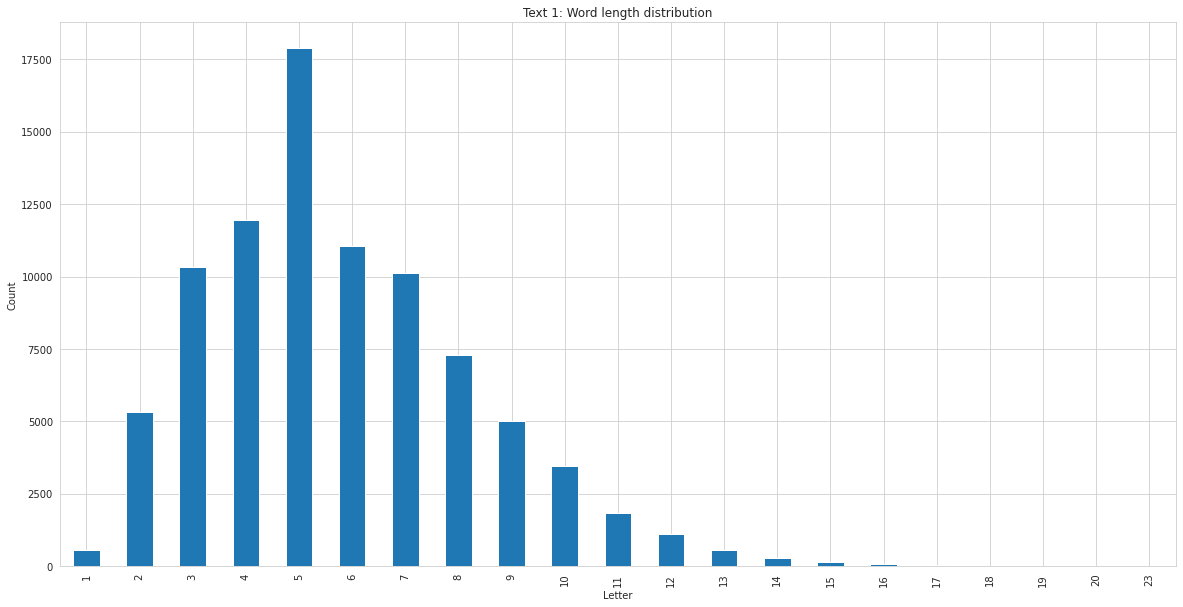

In [42]:
# Count unique words and word lengths

c1 = Counter(clean1)

word_counter1 = word_counter(c1)
word_count1 = word_count(word_counter1)

len1 = len_counter(clean1)

len_plot1 = plotter(data=len1, x="Letter", y="Count", title="Text 1: Word length distribution" )
len_plot1

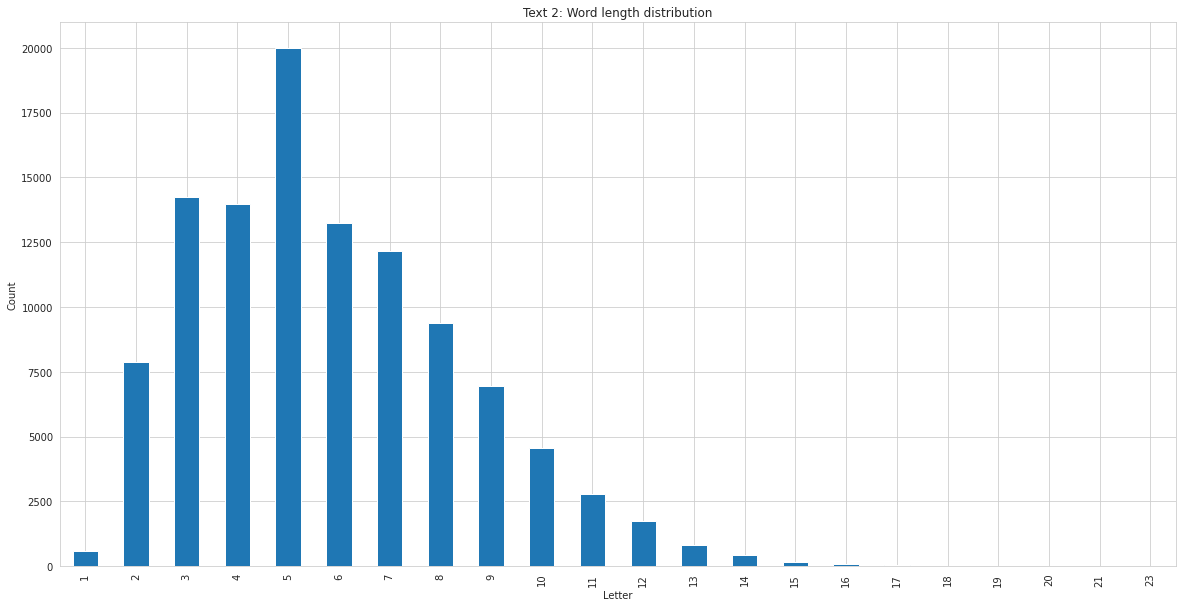

In [43]:
c2 = Counter(clean2)

word_counter2 = word_counter(c2)
word_count2 = word_count(word_counter2)

len2 = len_counter(clean2)

len_plot2 = plotter(data=len2, x="Letter", y="Count", title="Text 2: Word length distribution" )
len_plot2 

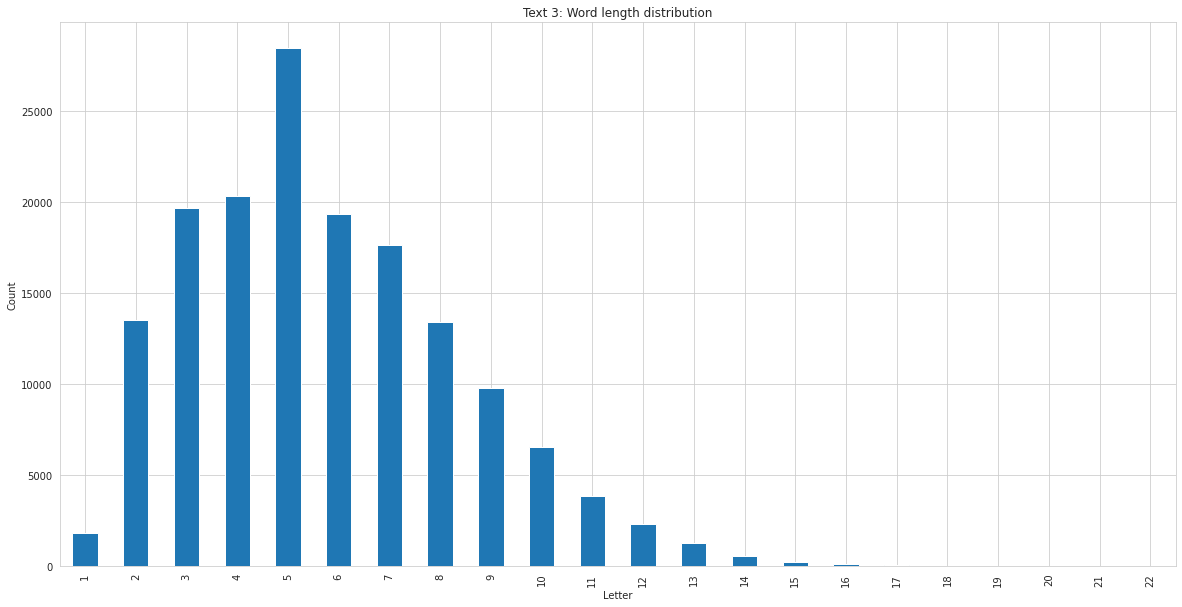

In [44]:
c3 = Counter(clean3)

word_counter3 = word_counter(c3)
word_count3 = word_count(word_counter3)

len3 = len_counter(clean3)

len_plot3 = plotter(data=len3, x="Letter", y="Count", title="Text 3: Word length distribution" )
len_plot3

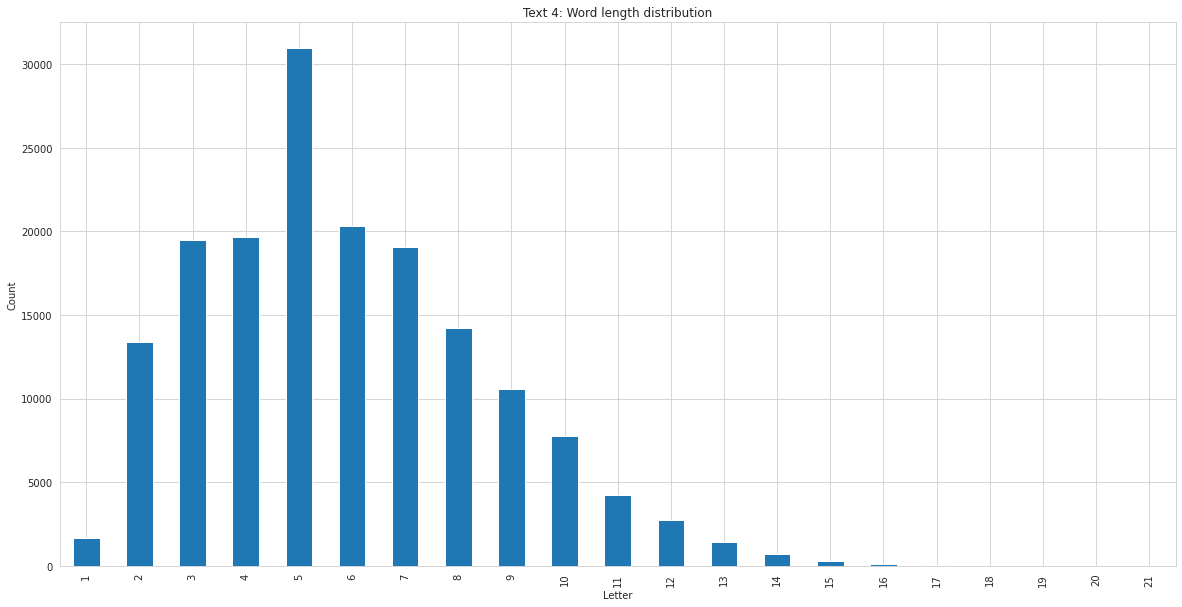

In [45]:
c4 = Counter(clean4)

word_counter4 = word_counter(c4)
word_count4 = word_count(word_counter4)

len4 = len_counter(clean4)

len_plot4 = plotter(data=len4, x="Letter", y="Count", title="Text 4: Word length distribution" )
len_plot4

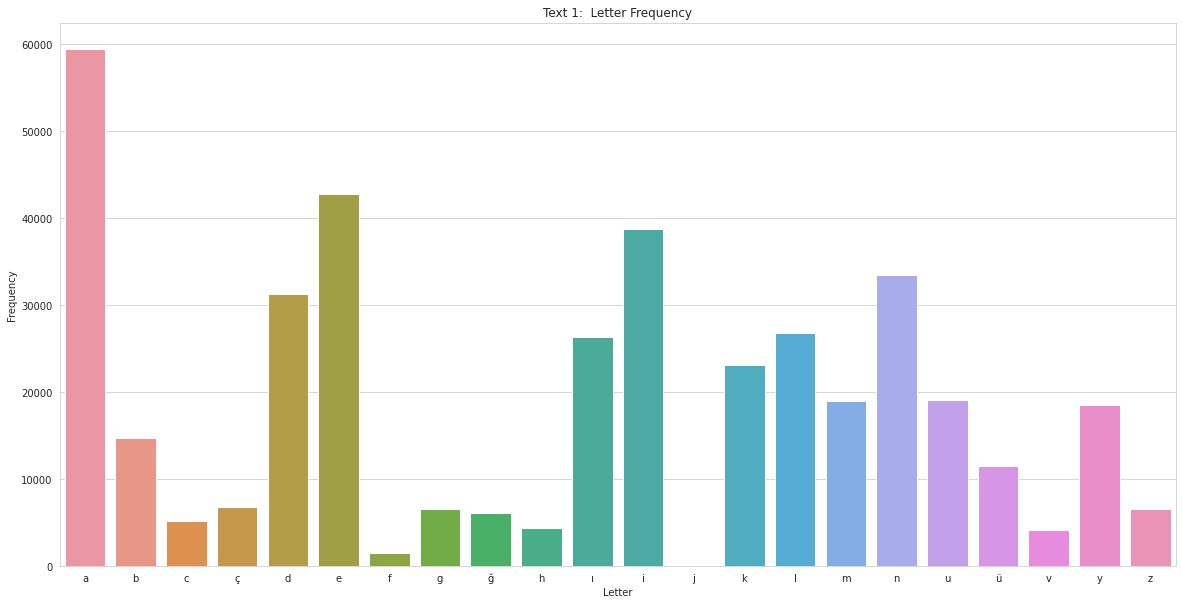

In [46]:
# Count letters
letter_counter1 = []
letter1 = letter_count(letter_counter1, txt1)

letter_freq1 = barplotter(letter1, "Letter", "Frequency", "Text 1:  Letter Frequency")
letter_freq1

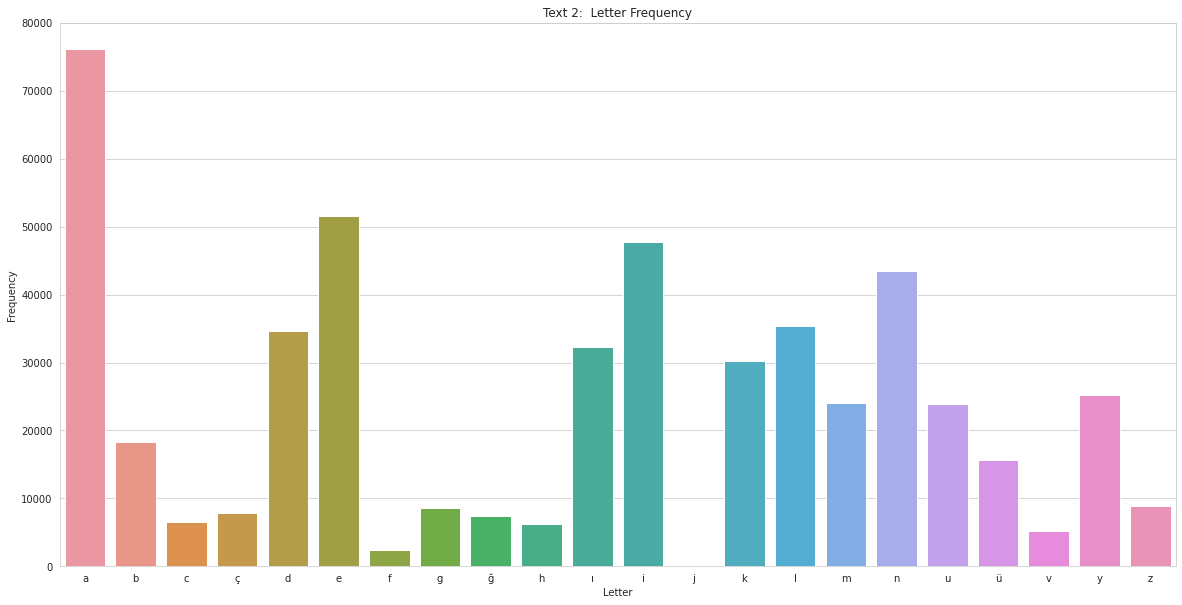

In [47]:
letter_counter2 = []
letter2 = letter_count(letter_counter2, txt2)

letter_freq2 = barplotter(letter2, "Letter", "Frequency", "Text 2:  Letter Frequency")
letter_freq2

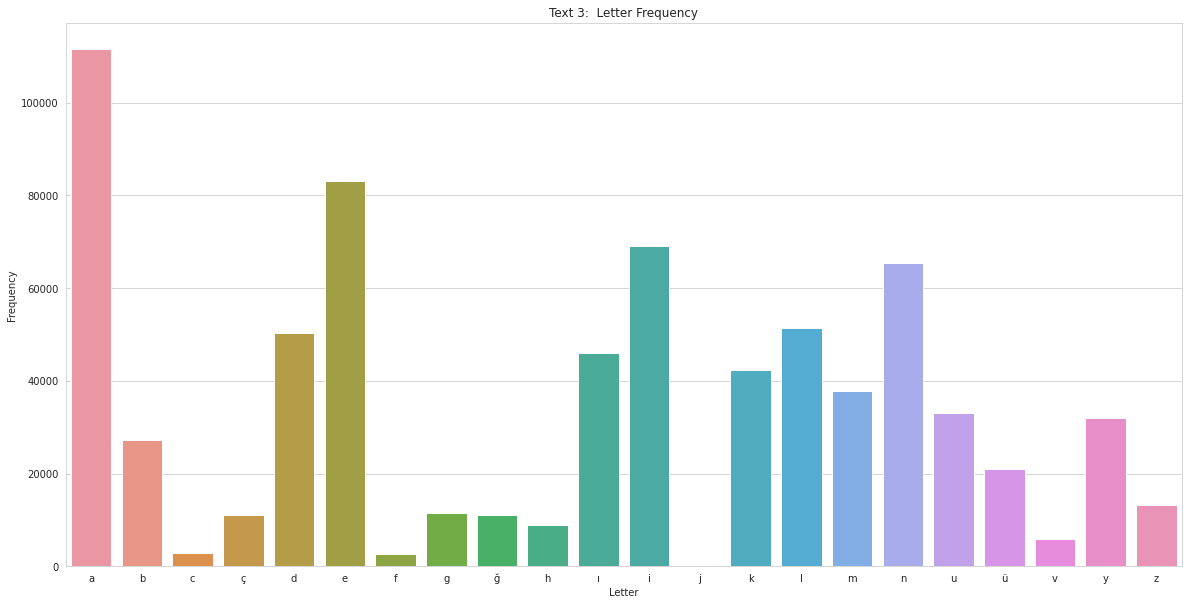

In [48]:
letter_counter3 = []
letter3 = letter_count(letter_counter3, txt3)

letter_freq3 = barplotter(letter3, "Letter", "Frequency", "Text 3:  Letter Frequency")
letter_freq3

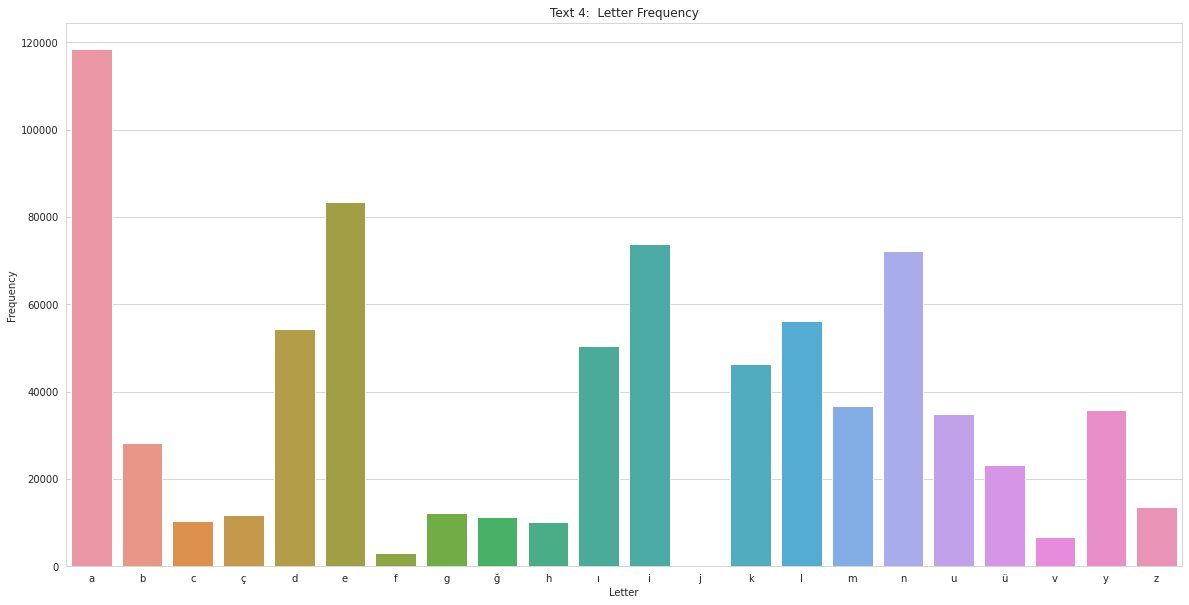

In [49]:
letter_counter4 = []
letter4 = letter_count(letter_counter4, txt4)

letter_freq4 = barplotter(letter4, "Letter", "Frequency", "Text 4:  Letter Frequency")
letter_freq4

In [50]:
# Probability function

def probability(prob, count):
  for i in range(0,len(count)):
    prob.append(count[i]/sum(count))
  return prob
    

# Entropy function

def entropy(prob):
  return - sum(prob * np.log2(prob))

In [51]:
# Calculate word probability

word_prob1 = []
word_prob2 = []
word_prob3 = []
word_prob4 = []

word_prob1 = probability(word_prob1, word_count1)
word_prob2 = probability(word_prob2, word_count2)
word_prob3 = probability(word_prob3, word_count3)
word_prob4 = probability(word_prob4, word_count4)

In [52]:
# Calculate letter probability

letter_prob1 = []
letter_prob2 = []
letter_prob3 = []
letter_prob4 = []

letter_prob1 = probability(letter_prob1, letter_counter1)
letter_prob2 = probability(letter_prob2, letter_counter2)
letter_prob3 = probability(letter_prob3, letter_counter3)
letter_prob4 = probability(letter_prob4, letter_counter4)

In [53]:
# Calculate relative entropy

rel1 = entropy(letter_prob1)
rel2 = entropy(letter_prob2)
rel3 = entropy(letter_prob3)
rel4 = entropy(letter_prob4)

# Average

from statistics import mean

rel_mean = mean((rel1,rel2,rel3,rel4))
rel_mean

3.960665966031958

In [54]:
# Calculate Shannon entropy

shan1 = entropy(word_prob1)
shan2 = entropy(word_prob2)
shan3 = entropy(word_prob3)
shan4 = entropy(word_prob4)

# Average

shan_mean = mean((shan1,shan2,shan3,shan4))
shan_mean

11.851542286009623